# 1. CNN (mnist)

参考: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

In [12]:
import numpy
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## データの読み込み

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 画像の正規化
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255

In [4]:
# one-hot化
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## ConvolutionとPooling

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [7]:
early_stopping = EarlyStopping(patience=0, verbose=1)
history = model.fit(X_train, y_train, batch_size=100, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s - loss: 0.2389 - acc: 0.9293 - val_loss: 0.0755 - val_acc: 0.9781
Epoch 2/10
60000/60000 [==============================] - 52s - loss: 0.0690 - acc: 0.9790 - val_loss: 0.0568 - val_acc: 0.9824
Epoch 3/10
60000/60000 [==============================] - 52s - loss: 0.0528 - acc: 0.9840 - val_loss: 0.0428 - val_acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 49s - loss: 0.0431 - acc: 0.9863 - val_loss: 0.0413 - val_acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 51s - loss: 0.0361 - acc: 0.9886 - val_loss: 0.0455 - val_acc: 0.9854
Epoch 00004: early stopping


In [8]:
score = model.evaluate(X_test, y_test, verbose=0)

In [9]:
print('Test loss: %.4f, Test accuracy: %.3f' % (score[0], score[1]))

Test loss: 0.0455, Test accuracy: 0.985


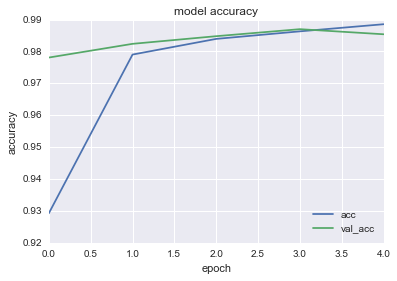

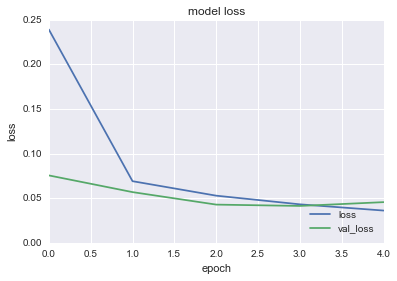

In [13]:
# 参考: http://aidiary.hatenablog.com/entry/20161109/1478696865
def plot_history(history):

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

plot_history(history)

# 2. CNN (cifar10)

- BatchNormとか
- Resnetのショートカット構造を作るとか
http://ni4muraano.hatenablog.com/entry/2017/03/26/083000
- 別Chapter?